# Clustering con Python

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../../datasets/wine/winequality-red.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

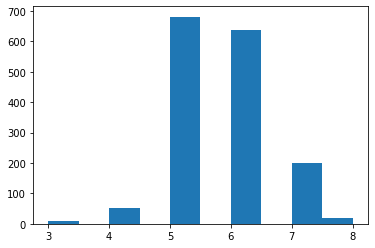

In [4]:
import matplotlib.pyplot as plt
plt.hist(df["quality"])
plt.show()

In [5]:
df.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


## Normalización de los datos

In [6]:
df_norm = (df - df.min()) / (df.max() - df.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


## Clustering jerárquico con scikit-learn

In [7]:
from sklearn.cluster import AgglomerativeClustering

In [8]:
clus = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(df_norm)

In [9]:
md_h = pd.Series(clus.labels_)

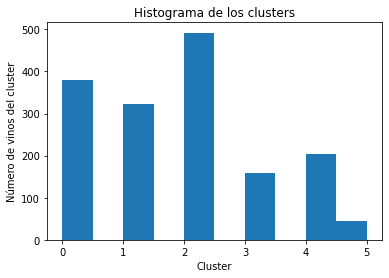

In [10]:
plt.hist(md_h)
plt.title("Histograma de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Número de vinos del cluster")
plt.show()

In [11]:
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]], dtype=int64)

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [13]:
Z = linkage(df_norm, method="ward")

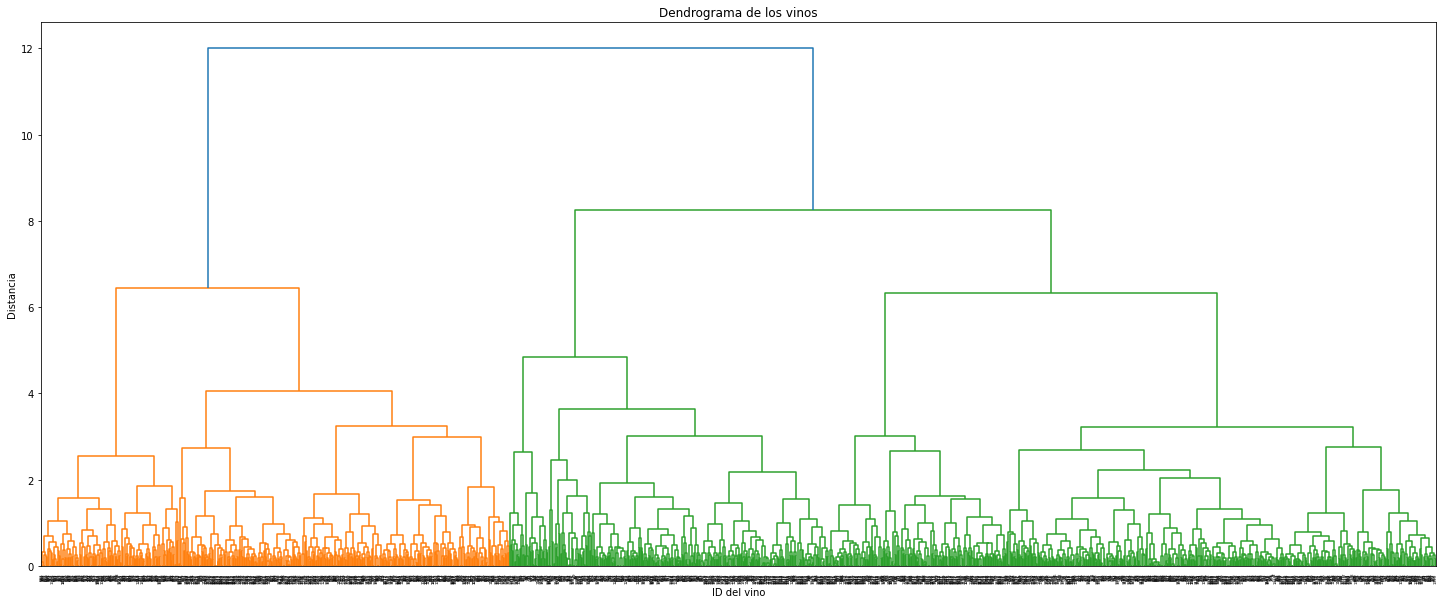

In [14]:
plt.figure(figsize=(25, 10))
plt.title("Dendrograma de los vinos")
plt.xlabel("ID del vino")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90.0, leaf_font_size=4.0)
plt.show()

## K-means

In [15]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [16]:
model = KMeans(n_clusters=6)
model.fit(df_norm)

KMeans(n_clusters=6)

In [17]:
model.labels_

array([1, 1, 1, ..., 4, 1, 0])

In [18]:
md_k = pd.Series(model.labels_)

In [19]:
df_norm["clust_h"] = md_h
df_norm["clust_k"] = md_k

In [20]:
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,1
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,1
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,1
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,3
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,1


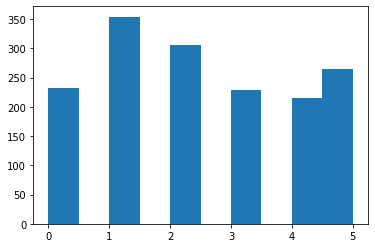

In [21]:
plt.hist(md_k)
plt.show()

In [22]:
model.cluster_centers_

array([[0.37061337, 0.15447863, 0.43353448, 0.10710912, 0.10521847,
        0.16616076, 0.08407457, 0.40459011, 0.41206218, 0.23977906,
        0.50570292, 0.71551724],
       [0.2380131 , 0.38830199, 0.06816384, 0.09382981, 0.1207521 ,
        0.16720379, 0.10748438, 0.47987755, 0.52215401, 0.1517981 ,
        0.23517311, 0.42033898],
       [0.32386479, 0.27199641, 0.26603279, 0.08704244, 0.13071513,
        0.1403371 , 0.12401089, 0.51570256, 0.42460307, 0.18747423,
        0.21651955, 0.49836066],
       [0.58785794, 0.20893402, 0.54218341, 0.13587964, 0.17389973,
        0.14558091, 0.09827642, 0.65669225, 0.31661108, 0.25290903,
        0.29201657, 0.54585153],
       [0.17254579, 0.3166295 , 0.09711628, 0.09346926, 0.09454517,
        0.25355388, 0.12742214, 0.31726941, 0.57791613, 0.18546163,
        0.4991294 , 0.61488372],
       [0.32428265, 0.28208022, 0.31212121, 0.16536945, 0.12984393,
        0.40380922, 0.31579934, 0.54629444, 0.42561441, 0.18887226,
        0.21536519,

In [23]:
model.inertia_

188.55131387984812

## Interpretación final

In [24]:
df_norm.groupby("clust_k").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clust_k,,,,,,,,,,,,,
0,0.370613,0.154479,0.433534,0.107109,0.105218,0.166161,0.084075,0.404590,0.412062,0.239779,0.505703,0.715517,0.081897
1,0.238013,0.388302,0.068164,0.093830,0.120752,0.167204,0.107484,0.479878,0.522154,0.151798,0.235173,0.420339,2.135593
2,0.323865,0.271996,0.266033,0.087042,0.130715,0.140337,0.124011,0.515703,0.424603,0.187474,0.216520,0.498361,1.527869
3,0.587858,0.208934,0.542183,0.135880,0.173900,0.145581,0.098276,0.656692,0.316611,0.252909,0.292017,0.545852,2.467249
4,0.172546,0.316629,0.097116,0.093469,0.094545,0.253554,0.127422,0.317269,0.577916,0.185462,0.499129,0.614884,3.423256
5,0.324283,0.282080,0.312121,0.165369,0.129844,0.403809,0.315799,0.546294,0.425614,0.188872,0.215365,0.450758,1.037879
